In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [126]:
# way to read csv from data
csv_path = os.path.join("data", "nifty50_closing_prices.csv")

data= pd.read_csv(csv_path)

In [127]:
# df.head()

In [128]:
# another war to read 
# data = pd.read_csv("../../data/nifty50_closing_prices.csv")

In [ ]:
data.head()

,Date,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,LT.NS,...,HEROMOTOCO.NS,DRREDDY.NS,SHREECEM.NS,BRITANNIA.NS,UPL.NS,EICHERMOT.NS,SBILIFE.NS,ADANIPORTS.NS,BAJAJ-AUTO.NS,HINDALCO.NS
0,2024-08-20 00:00:00+05:30,2991.899902,1637.699951,1179.449951,1872.199951,4523.299805,1805.650024,2751.050049,498.799988,3572.699951,...,5244.399902,6965.350098,24730.550781,5765.799805,566.150024,4883.250000,1761.300049,1492.550049,9779.700195,672.900024
1,2024-08-21 00:00:00+05:30,2997.350098,1625.800049,1174.849976,1872.699951,4551.500000,1812.949951,2791.199951,505.399994,3596.050049,...,5284.700195,7062.450195,24808.050781,5837.350098,568.299988,4913.549805,1800.599976,1503.500000,9852.000000,685.599976
2,2024-08-22 00:00:00+05:30,2996.250000,1631.300049,1191.099976,1880.250000,4502.000000,1821.500000,2792.800049,504.549988,3606.500000,...,5329.950195,6969.049805,25012.400391,5836.799805,579.150024,4933.549805,1795.250000,1492.300049,9914.200195,685.549988
3,2024-08-23 00:00:00+05:30,2999.949951,1625.050049,1203.500000,1862.099976,4463.899902,1818.000000,2815.600098,505.799988,3598.550049,...,5384.899902,6954.500000,24706.050781,5792.649902,573.700012,4898.100098,1789.300049,1491.300049,10406.450195,685.099976
4,2024-08-26 00:00:00+05:30,3025.199951,1639.949951,1213.300049,1876.150024,4502.450195,1812.500000,2821.149902,505.700012,3641.899902,...,5343.750000,6943.299805,24906.449219,5796.950195,577.450012,4875.200195,1796.250000,1482.550049,10432.549805,711.849976


## Data Preparation


In [56]:
# Check missing values

missing_data = data.isna().sum()

# check for date column
check_date = pd.to_datetime(data['Date'], errors='coerce').notna().all()
print(check_date)


True


In [57]:
# check if the data has sufficient rows for time-series analysis

sufficient_row = data.shape[0] >= 20 # Minimum rows needed for rolling/moving averages
print(sufficient_row)

True


In [58]:
# preparing a summary of the checks

data_prep_sats = {
    "Missing value": missing_data[missing_data > 0].to_dict(),
    "Date column format": check_date,
    "sufficient_row": sufficient_row
}
data_prep_sats

{'Missing value': {'HDFC.NS': 24},
 'Date column format': np.True_,
 'sufficient_row': True}

In [65]:
len(data.columns)

51

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24 non-null     object 
 1   RELIANCE.NS    24 non-null     float64
 2   HDFCBANK.NS    24 non-null     float64
 3   ICICIBANK.NS   24 non-null     float64
 4   INFY.NS        24 non-null     float64
 5   TCS.NS         24 non-null     float64
 6   KOTAKBANK.NS   24 non-null     float64
 7   HINDUNILVR.NS  24 non-null     float64
 8   ITC.NS         24 non-null     float64
 9   LT.NS          24 non-null     float64
 10  SBIN.NS        24 non-null     float64
 11  BAJFINANCE.NS  24 non-null     float64
 12  BHARTIARTL.NS  24 non-null     float64
 13  HCLTECH.NS     24 non-null     float64
 14  ASIANPAINT.NS  24 non-null     float64
 15  AXISBANK.NS    24 non-null     float64
 16  DMART.NS       24 non-null     float64
 17  MARUTI.NS      24 non-null     float64
 18  ULTRACEMCO.N

In [74]:
def data_wrangle(path):
    # path = os.path.join("data", 'nifty50_closing_prices.csv')
    df = pd.read_csv(path)

    # Check null values
    missing_data = df.isna().sum()
    # dropping missing value, since it misses all the items in HDFC.NS column
    df = df.drop(columns=['HDFC.NS'])

    # convert date column into datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    # sort the dataset by date to ensure proper time-series order
    df = df.sort_values(by='Date')
    # reset index for a clean dataframe
    df.reset_index(drop=True, inplace=True)
    
    return df



In [75]:
dataframe = data_wrangle(os.path.join("data", 'nifty50_closing_prices.csv'))
dataframe.head()

,Date,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,LT.NS,...,HEROMOTOCO.NS,DRREDDY.NS,SHREECEM.NS,BRITANNIA.NS,UPL.NS,EICHERMOT.NS,SBILIFE.NS,ADANIPORTS.NS,BAJAJ-AUTO.NS,HINDALCO.NS
0,2024-08-20 00:00:00+05:30,2991.899902,1637.699951,1179.449951,1872.199951,4523.299805,1805.650024,2751.050049,498.799988,3572.699951,...,5244.399902,6965.350098,24730.550781,5765.799805,566.150024,4883.250000,1761.300049,1492.550049,9779.700195,672.900024
1,2024-08-21 00:00:00+05:30,2997.350098,1625.800049,1174.849976,1872.699951,4551.500000,1812.949951,2791.199951,505.399994,3596.050049,...,5284.700195,7062.450195,24808.050781,5837.350098,568.299988,4913.549805,1800.599976,1503.500000,9852.000000,685.599976
2,2024-08-22 00:00:00+05:30,2996.250000,1631.300049,1191.099976,1880.250000,4502.000000,1821.500000,2792.800049,504.549988,3606.500000,...,5329.950195,6969.049805,25012.400391,5836.799805,579.150024,4933.549805,1795.250000,1492.300049,9914.200195,685.549988
3,2024-08-23 00:00:00+05:30,2999.949951,1625.050049,1203.500000,1862.099976,4463.899902,1818.000000,2815.600098,505.799988,3598.550049,...,5384.899902,6954.500000,24706.050781,5792.649902,573.700012,4898.100098,1789.300049,1491.300049,10406.450195,685.099976
4,2024-08-26 00:00:00+05:30,3025.199951,1639.949951,1213.300049,1876.150024,4502.450195,1812.500000,2821.149902,505.700012,3641.899902,...,5343.750000,6943.299805,24906.449219,5796.950195,577.450012,4875.200195,1796.250000,1482.550049,10432.549805,711.849976


In [87]:
descriptive = dataframe.describe().loc[['mean', 'std', 'min', 'max']].T
descriptive

,mean,std,min,max
RELIANCE.NS,2976.912506,41.290551,2903.000000,3041.850098
HDFCBANK.NS,1652.339579,28.258220,1625.050049,1741.199951
ICICIBANK.NS,1236.770818,36.438726,1174.849976,1338.449951
INFY.NS,1914.558324,30.240685,1862.099976,1964.500000
TCS.NS,4478.349976,70.822718,4284.899902,4553.750000
KOTAKBANK.NS,1809.422918,32.936318,1764.150024,1904.500000
HINDUNILVR.NS,2845.333344,65.620694,2751.050049,2977.600098
ITC.NS,507.739581,5.472559,497.299988,519.500000
LT.NS,3647.099976,60.511574,3536.949951,3793.899902
SBIN.NS,802.233332,17.442330,768.599976,824.799988


## Portfolio Analysis

Portfolio Analysis is the process of evaluating the performance of a collection of financial assets (a portfolio) to understand its returns, risks, and overall behaviour. It helps investors optimize asset allocation to achieve specific financial goals. Let’s perform a portfolio analysis:

In [90]:
# assign weights to a subset of stocks (example: RELIANCE.NS, HDFCBANK.NS, ICICIBANK.NS)
wights = [0.5, 0.4, 0.35]
portfolio_data = dataframe[['RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS']]

In [92]:
# calculate daily returns
daily_returns = portfolio_data.pct_change().dropna()
daily_returns.head()

,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS
1,0.001822,-0.007266,-0.003900
2,-0.000367,0.003383,0.013832
3,0.001235,-0.003831,0.010411
4,0.008417,0.009169,0.008143
5,-0.008033,-0.001341,0.010756


## Risk Assessment

Risk Assessment is the process of evaluating the potential risks in an investment, such as price volatility and potential losses, to help investors make informed decisions. Let’s perform a risk assessment:

In [96]:
# Calculate standard deviation (volatility)
volatility = daily_returns.std()
print(f'volatility is: {volatility}')


# Calculate VaR (95% confidence level)
confidence_l = 0.05
var = daily_returns.quantile(confidence_l)
print(f'Var is: {var}')

volatility is: RELIANCE.NS     0.008708
HDFCBANK.NS     0.006901
ICICIBANK.NS    0.011594
dtype: float64
Var is: RELIANCE.NS    -0.013624
HDFCBANK.NS    -0.005987
ICICIBANK.NS   -0.008577
Name: 0.05, dtype: float64


In [98]:
# Display risk metrics

risk_mat = pd.DataFrame({'Volatility (std)': volatility, 'Value at risk (var)': var})
risk_mat

,Volatility (std),Value at risk (var)
RELIANCE.NS,0.008708,-0.013624
HDFCBANK.NS,0.006901,-0.005987
ICICIBANK.NS,0.011594,-0.008577


In [117]:
corr = daily_returns.corr()
corr

,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS
RELIANCE.NS,1.000000,0.424124,0.365943
HDFCBANK.NS,0.424124,1.000000,0.693924
ICICIBANK.NS,0.365943,0.693924,1.000000


<Axes: >

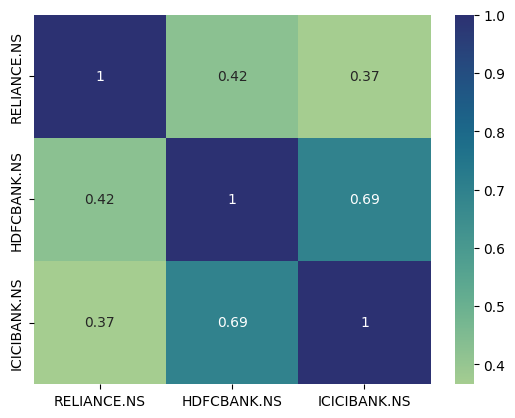

In [118]:
sns.heatmap(corr, annot=True, cmap='crest')

## Relative Strength Index (RSI)

Relative Strength Index (RSI) is a momentum oscillator that measures the speed and change of price movements, ranging from 0 to 100. It helps identify overbought (RSI > 70) or oversold (RSI < 30) conditions in a stock, to signal potential buy or sell opportunities. Let’s calculate RSI:

In [120]:
# RSI calculation function
def calc_rsi(prices, windows = 14):
    delta = prices.diff()
    gain = (delta.where(delta > 0,0)).rolling(window = windows).mean()
    loss = (delta.where(delta < 0,0)).rolling(window = windows).mean()


    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

dataframe['RELIANCE_RSI'] = calc_rsi(dataframe['RELIANCE.NS'])

print(dataframe['RELIANCE_RSI'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13   -166.667059
14   -154.851111
15   -132.301459
16   -105.415602
17   -374.723034
18   -157.536300
19   -216.409452
20   -245.866042
21    -71.857505
22   -118.962019
23   -188.459557
Name: RELIANCE_RSI, dtype: float64


## Sharpe Ratio

Sharpe Ratio is a measure of risk-adjusted return that indicates how much excess return an investment generates for each unit of risk taken. It is calculated by subtracting the risk-free rate from the mean returns and dividing the result by the investment’s volatility (standard deviation). Let’s calculate the Sharpe ratio:

In [123]:
# calculate average returns and volatility
mean_returns = daily_returns.mean()
volatility = daily_returns.std()

# assume a risk-free rate
risk_free_rate = 0.04 / 252

# calculate sharpe ratio
sharpe_ratios = (mean_returns - risk_free_rate) / volatility

table_data = pd.DataFrame({
    'Stock': sharpe_ratios.index,
    'Sharpe Ratio': sharpe_ratios.values.round(2)
})

print(table_data)

          Stock  Sharpe Ratio
0   RELIANCE.NS         -0.05
1   HDFCBANK.NS          0.37
2  ICICIBANK.NS          0.47


## Summary

The financial data analysis provided valuable insights into the performance, risk, and potential future behaviour of NIFTY50 stocks.